# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

### Откроем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import BaggingRegressor

### Константы

In [2]:
RANDOM_STATE = 14149
blue = '#069af3'
green = '#7eb54e'
red = '#ef4026'

- red, green, blue - цвета для будующих графиков

### Откроем и изучим файлы

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

### Тренировочная выборка

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
for i in data_train:
    print('нулевых значений в столбце' ,i, data_train[data_train[i] == 0][i].count())

нулевых значений в столбце date 0
нулевых значений в столбце final.output.concentrate_ag 58
нулевых значений в столбце final.output.concentrate_pb 58
нулевых значений в столбце final.output.concentrate_sol 58
нулевых значений в столбце final.output.concentrate_au 58
нулевых значений в столбце final.output.recovery 58
нулевых значений в столбце final.output.tail_ag 75
нулевых значений в столбце final.output.tail_pb 75
нулевых значений в столбце final.output.tail_sol 75
нулевых значений в столбце final.output.tail_au 75
нулевых значений в столбце primary_cleaner.input.sulfate 0
нулевых значений в столбце primary_cleaner.input.depressant 10
нулевых значений в столбце primary_cleaner.input.feed_size 0
нулевых значений в столбце primary_cleaner.input.xanthate 0
нулевых значений в столбце primary_cleaner.output.concentrate_ag 74
нулевых значений в столбце primary_cleaner.output.concentrate_pb 74
нулевых значений в столбце primary_cleaner.output.concentrate_sol 74
нулевых значений в столбце p

'Общая гистограмма таблицы'

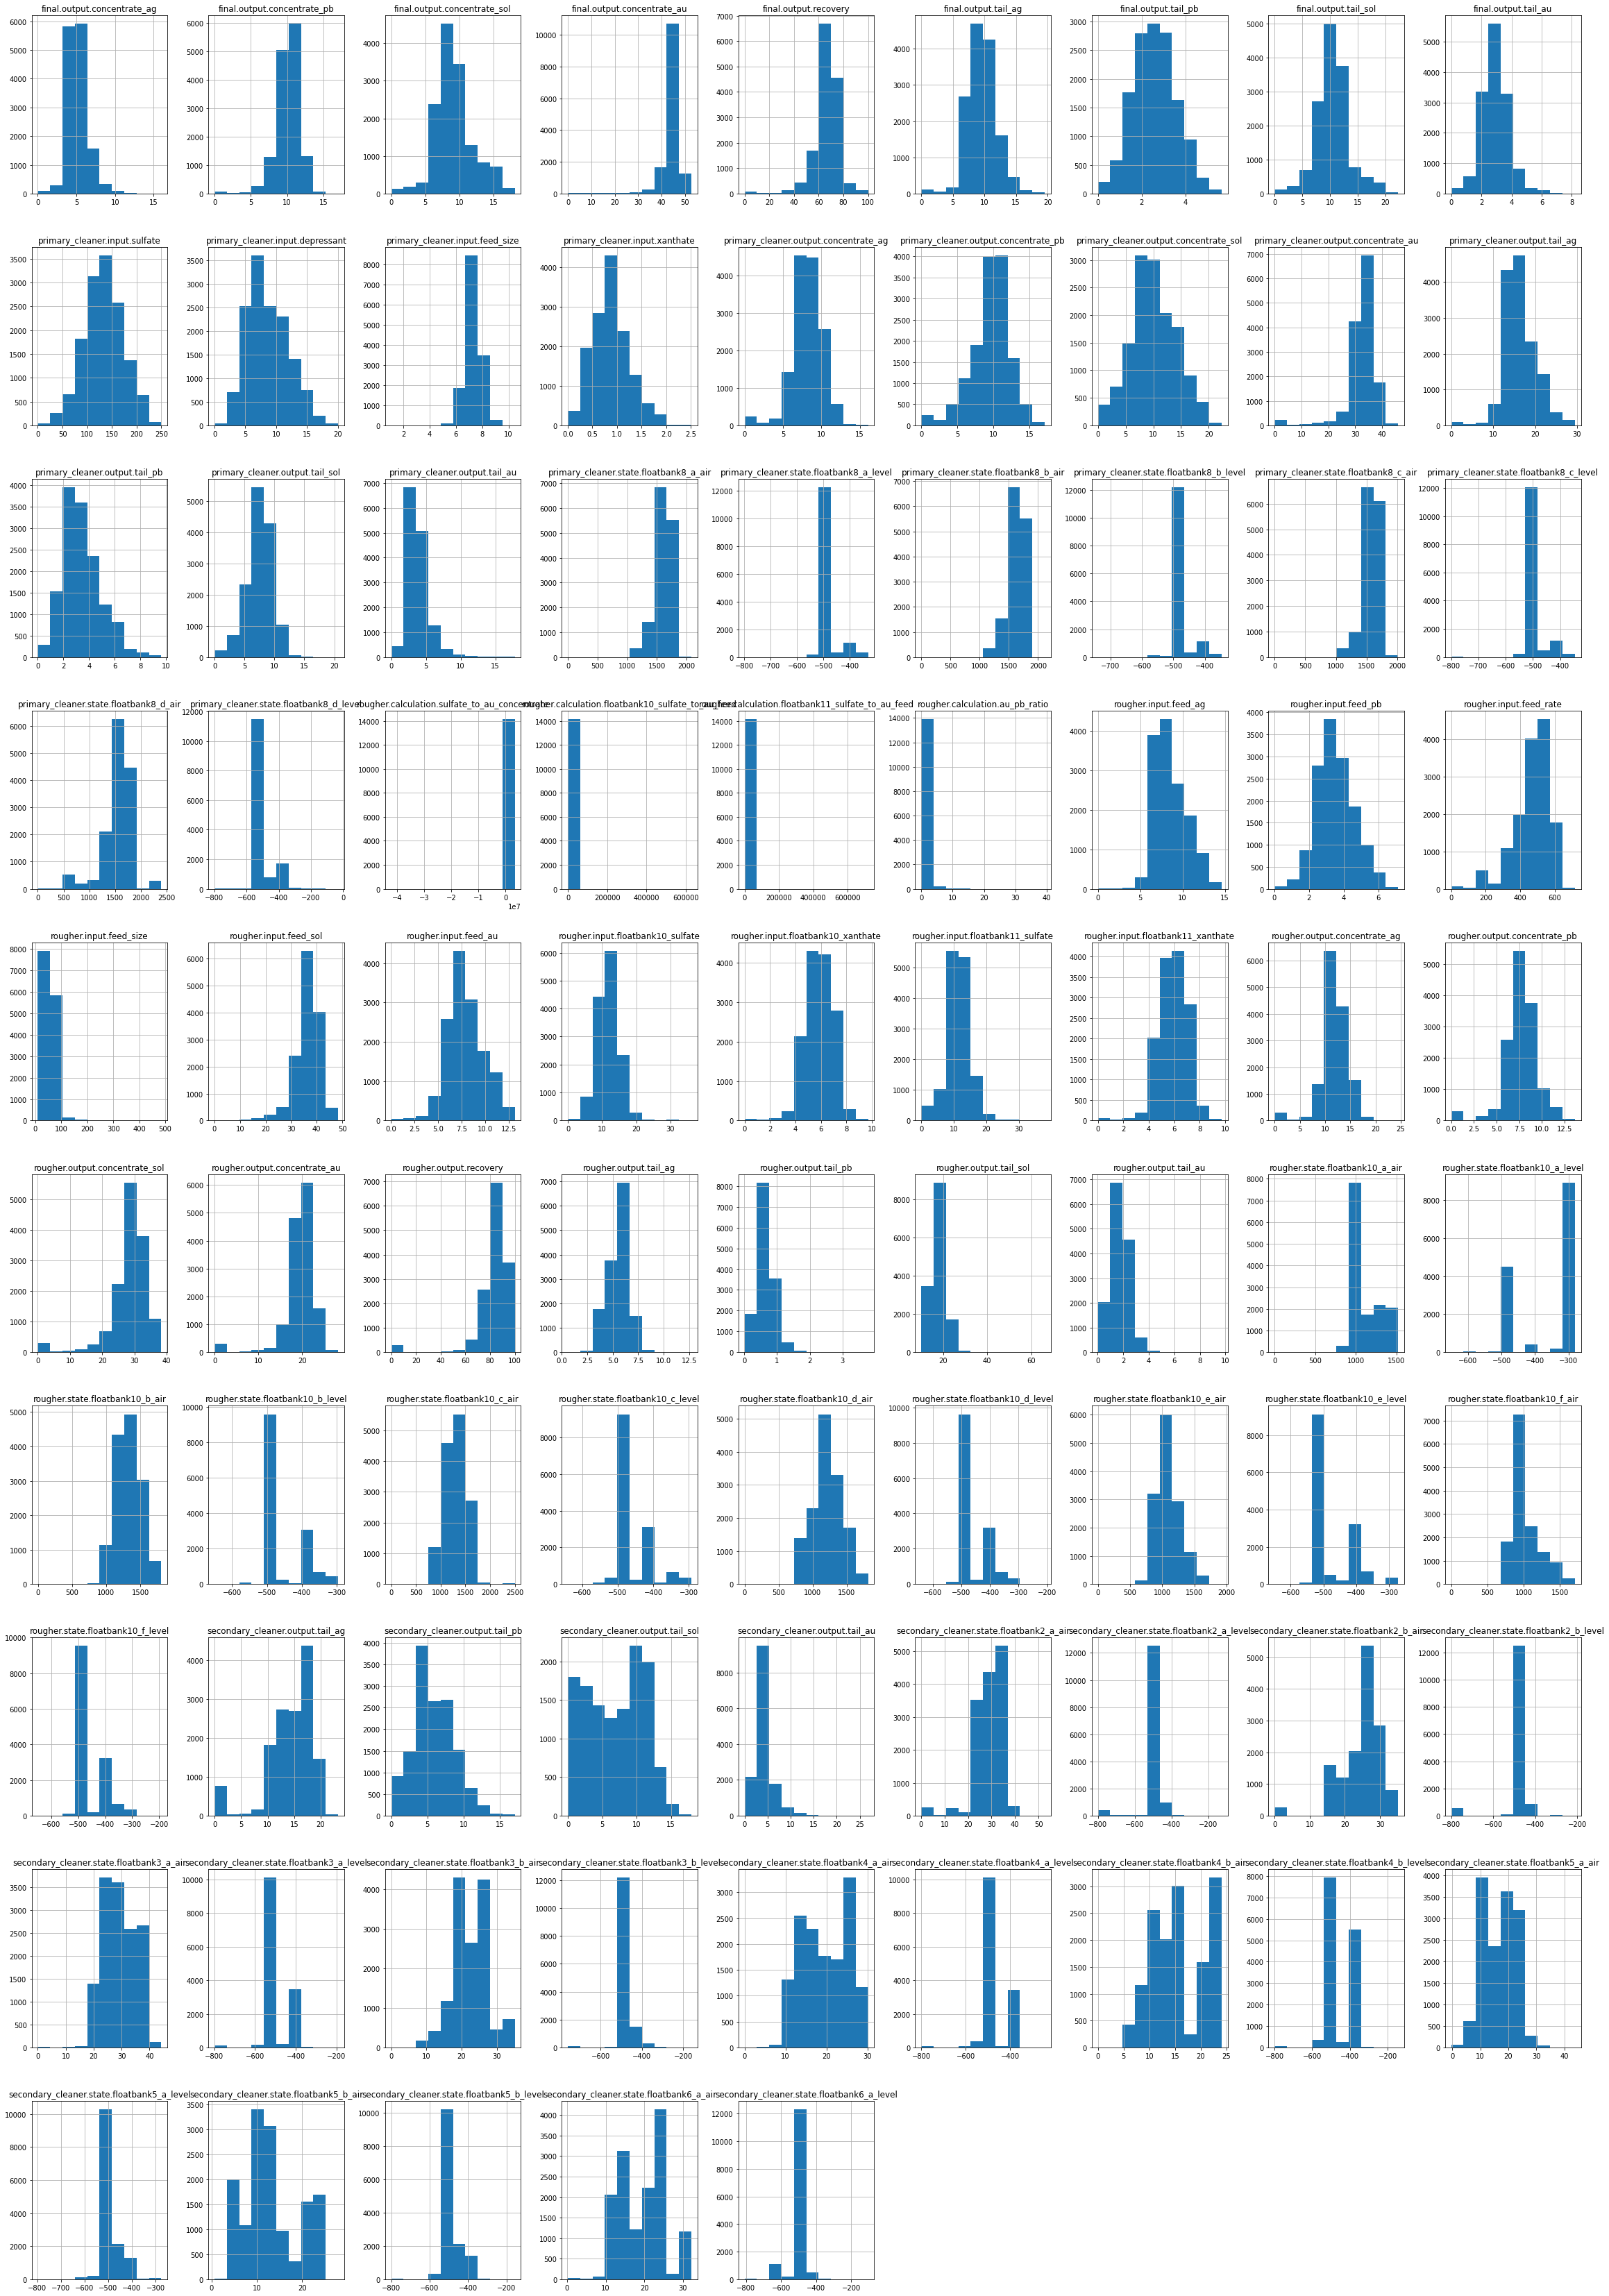

In [6]:
data_train.hist(figsize=(40, 60))
"Общая гистограмма таблицы"

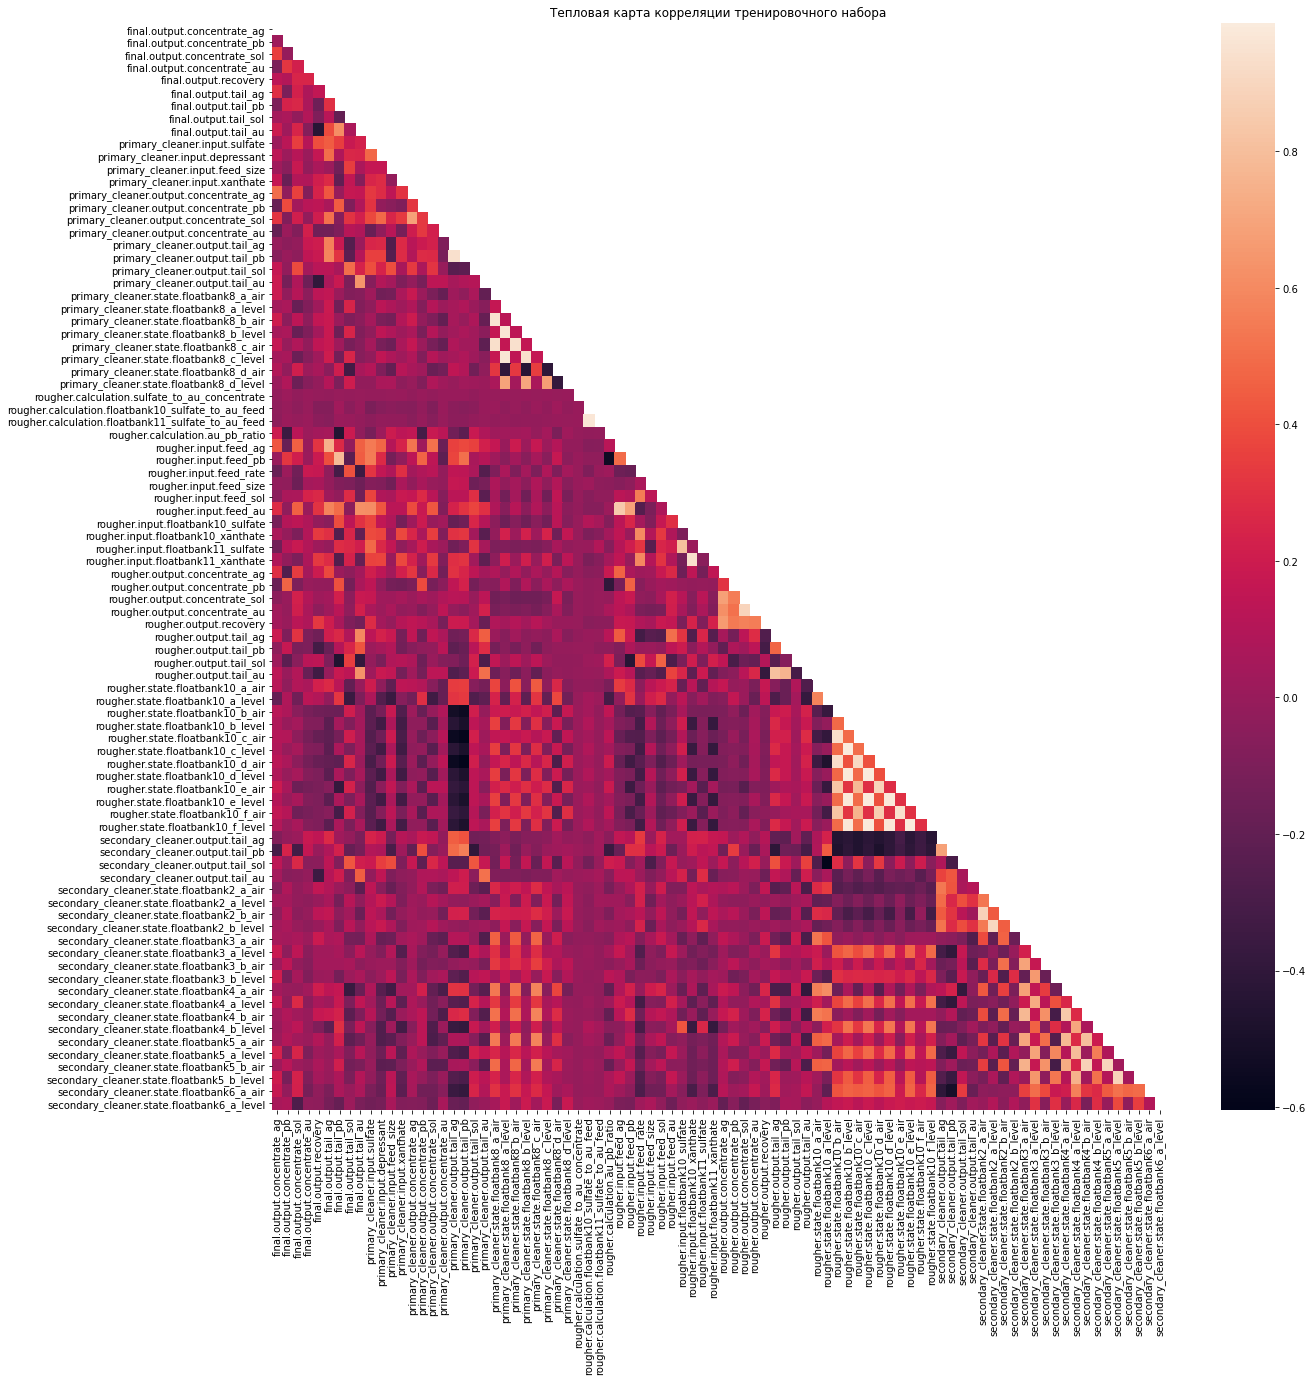

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_train.corr(), 
            annot = False, 
            mask=np.triu(data_train.corr())).set_title('Тепловая карта корреляции тренировочного набора')
plt.show()

In [8]:
data_train.corr()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.021110,0.351985,-0.104934,0.133238,0.289552,-0.099818,0.045896,0.193935,0.015923,...,0.041765,0.169538,0.020832,0.005319,0.013019,0.228753,0.021660,0.199048,0.170298,0.061009
final.output.concentrate_pb,0.021110,1.000000,-0.008451,0.320916,0.095000,-0.100616,0.240650,0.068287,0.029186,0.124170,...,-0.001365,-0.035219,0.092632,0.069315,0.095147,-0.096191,0.123765,-0.115190,-0.018740,0.075302
final.output.concentrate_sol,0.351985,-0.008451,1.000000,0.217363,0.249632,0.225460,0.259185,-0.023407,0.244294,0.343058,...,-0.007337,0.268279,0.032091,0.134591,0.031137,0.246817,0.015942,0.234651,0.228520,-0.276807
final.output.concentrate_au,-0.104934,0.320916,0.217363,1.000000,0.253067,0.079619,0.067949,0.098396,-0.070600,0.108014,...,0.035814,-0.042100,0.002307,-0.011165,0.005808,-0.098015,-0.014616,-0.086371,-0.123644,-0.030628
final.output.recovery,0.133238,0.095000,0.249632,0.253067,1.000000,0.151610,-0.151287,-0.088242,-0.435553,0.398307,...,0.207745,0.057454,0.170838,-0.088934,0.098267,0.024196,0.068331,0.043838,-0.027593,-0.035658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.228753,-0.096191,0.246817,-0.098015,0.024196,-0.008345,0.066600,-0.085835,0.116366,-0.031146,...,0.105263,0.790037,0.013033,0.554604,0.083423,1.000000,0.036557,0.884422,0.512286,0.379832
secondary_cleaner.state.floatbank5_b_air,0.021660,0.123765,0.015942,-0.014616,0.068331,0.008731,0.216899,-0.133159,-0.104743,-0.000789,...,0.723039,0.244762,0.878027,0.153923,0.892482,0.036557,1.000000,0.046352,0.474619,-0.025908
secondary_cleaner.state.floatbank5_b_level,0.199048,-0.115190,0.234651,-0.086371,0.043838,-0.000398,0.075721,-0.104591,0.101261,-0.022692,...,0.110727,0.747276,0.035808,0.515643,0.100697,0.884422,0.046352,1.000000,0.493110,0.342094
secondary_cleaner.state.floatbank6_a_air,0.170298,-0.018740,0.228520,-0.123644,-0.027593,-0.103898,0.072273,0.001968,0.068385,-0.106076,...,0.205628,0.566670,0.311765,0.271796,0.440929,0.512286,0.474619,0.493110,1.000000,0.098643


In [9]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [10]:
data_train['rougher.input.feed_rate'].isna().sum()

8

In [11]:
data_train['rougher.input.feed_size'].isna().sum()

144

In [12]:
pd.set_option('display.max_columns', None)
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

В данных переодически встречаются пропуски, однако это может быть связано с отсутствием тех или иных параметров, например на некоторых предприятиях могут не добавлять ксантогенат, воздух или не получать на выходе свинец или sol (не совсем понятно что это), ассоция почему-то только с солнцем, можно было подумать, что это соли, но они по другому обычно обозначаются, в общем то это не тот параметр, который мы ищем) 
Однако есть пропуски в столбцах rougher.input.feed_size (144 пропуска) и rougher.input.feed_rate (8 пропусков), размер гранул сырья и скорость подачи соответственно, вероятнее они обозначают параметры до флотации и могут оказаться важны для расчётов. При этом они точно не могут означать 0, было бы странно получить что-то из ничего) Судя по тепловой карте корреляции эти данные не зависят от каких-либо вводных, однако их можно заполнить средними значениями, что бы не терять данные. Пожалуй так и сделаем при подготовке данных

### Тестовая выборка

In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [14]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

### Общий файл

In [15]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [16]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

В целом, в полном и тестовом файле данные похожи, на тренировочные, те же пропуски, те же данные. В тестовом файле на 34 столбца меньше, отсутствуют данные о получаемом сырье после различных этапов обработки, их так же можно будет найти с помощью моделей, однако все они нам вряд-ли понадобятся, ведь целевой признак - это коэффициент восстановления золота из золотосодержащей руды, т.е. в конечном итоге нам нужно максимально точно предсказать данные для столбцов final.output.concentrate_au и final.output.tail_au,  доля золота в концентрате после флотации/очистки и  доля золота в отвальных хвостах после флотации/очистки соответственно

### Подготовка данных

Для начала заполним пропуски в тестовых данных у столбцов rougher.input.feed_rate и rougher.input.feed_size

In [17]:
data_train['rougher.input.feed_rate'] = data_train['rougher.input.feed_rate'].ffill()
data_train['rougher.input.feed_size'] = data_train['rougher.input.feed_size'].ffill()

## Анализ данных

Нам необходимо расчитать эффективность восстановления золота после финальной очистки, а так же после флотации. Для расчётов понадобиться немало данных, а именно: для расчёта эффективности очистки нам нужны столбцы - primary_cleaner.output.concentrate_au (тут по идее должен быть стобец secondary, а не primary, однако в табице его нет), final.output.tail_au и final.output.concentrate_au, а для расчёта эффективности флотации столбцы - rougher.input.feed_au, rougher.output.tail_au и rougher.output.concentrate_au. Сейчас посмотрим на все эти данные по общему файлу, а для тестового их необходимо будет найти с помощью моделей.

### Распределение долей золота

'Распределение доли золота в концентрате до финальной очистки'

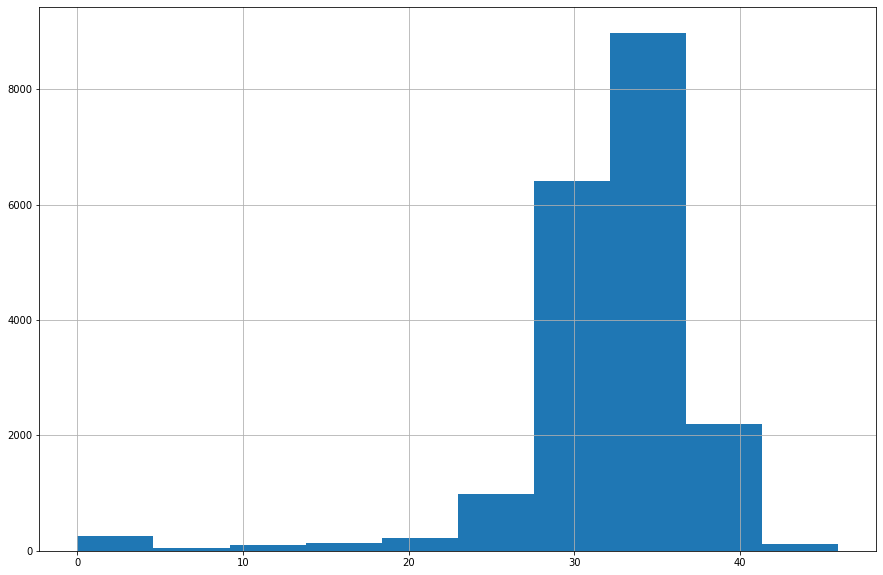

In [18]:
data_full['primary_cleaner.output.concentrate_au'].hist(figsize=(15, 10))
'Распределение доли золота в концентрате до финальной очистки'

'Распределение доли золота в отвальных хвостах после финальнй очистки'

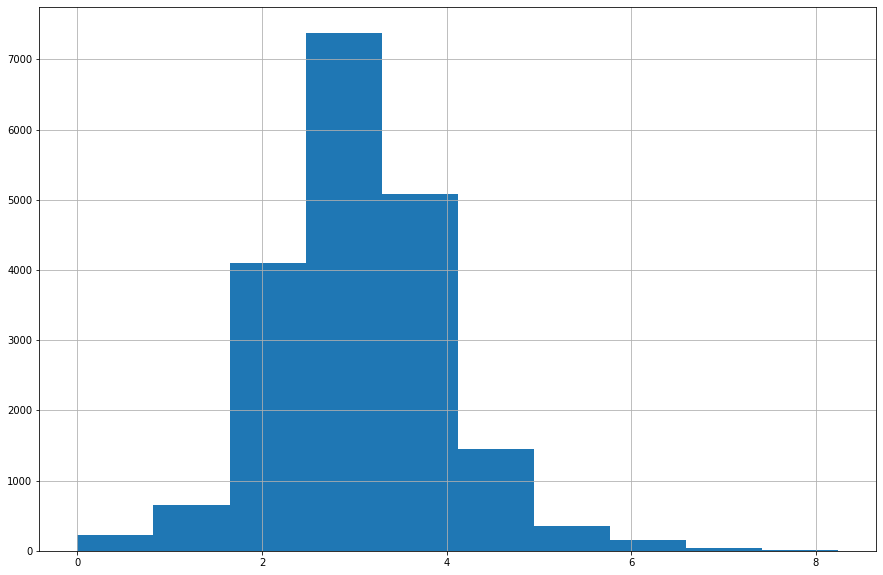

In [19]:
data_full['final.output.tail_au'].hist(figsize=(15, 10))
'Распределение доли золота в отвальных хвостах после финальнй очистки'

'Распределение доли золота в концентрате после финальнй очистки'

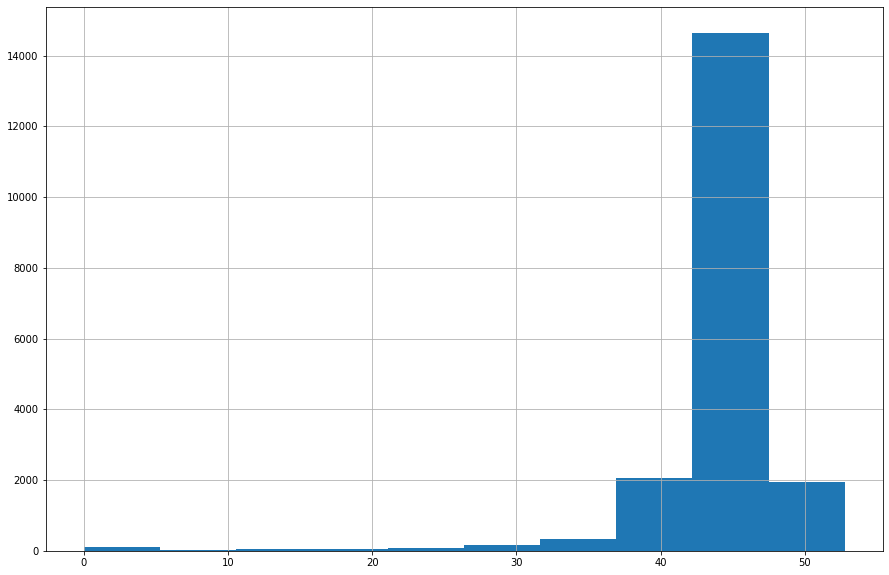

In [20]:
data_full['final.output.concentrate_au'].hist(figsize=(15, 10))
'Распределение доли золота в концентрате после финальнй очистки'

'Распределение доли золота в сырье'

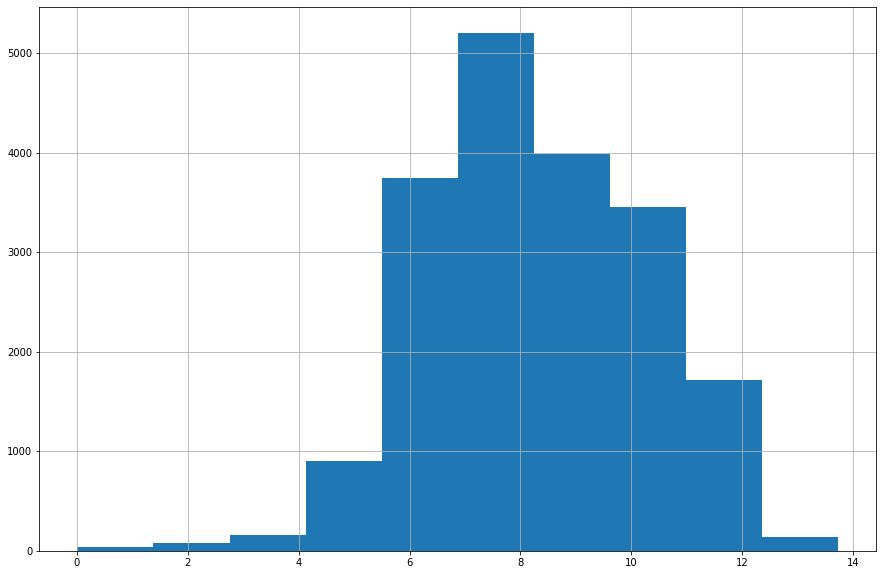

In [21]:
data_full['rougher.input.feed_au'].hist(figsize=(15, 10))
'Распределение доли золота в сырье'

'Распределение доли золота в отвальных хвостах после флотации'

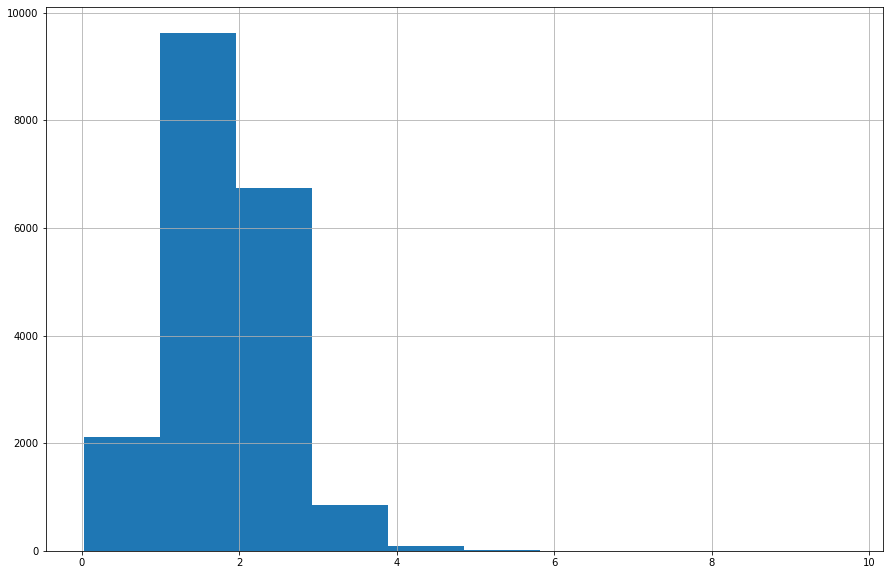

In [22]:
data_full['rougher.output.tail_au'].hist(figsize=(15, 10))
'Распределение доли золота в отвальных хвостах после флотации'

'Распределение доли золота в концентрате после флотации'

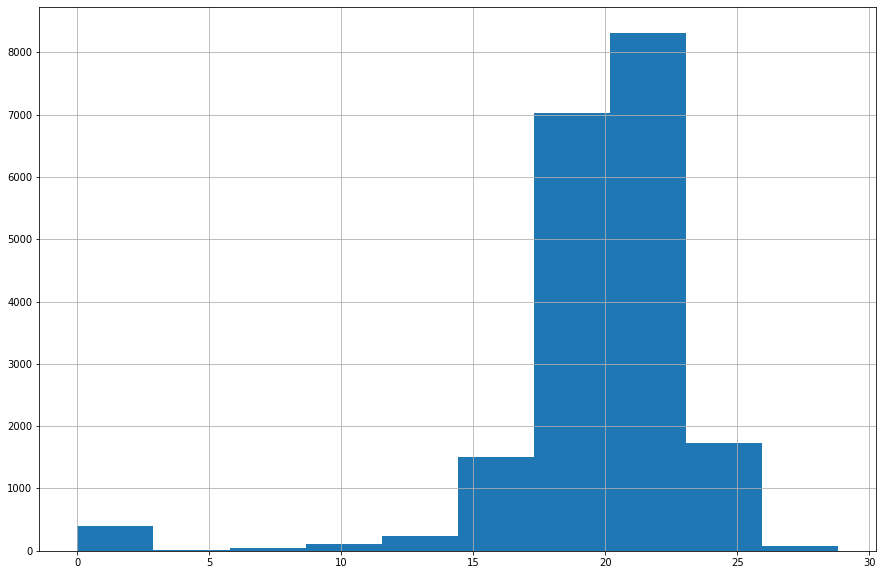

In [23]:
data_full['rougher.output.concentrate_au'].hist(figsize=(15, 10))
'Распределение доли золота в концентрате после флотации'

В среднем, в сырье изначально имеется около 8% золота, а после прохождения всех этапов уже 45%, очень неплохо, неверное. Теперь можно посмотреть на эффективность предприятий в целом.

### Эффективность предприятий

'Расчитанное распределение эффективности предприятий в финальной очистке'

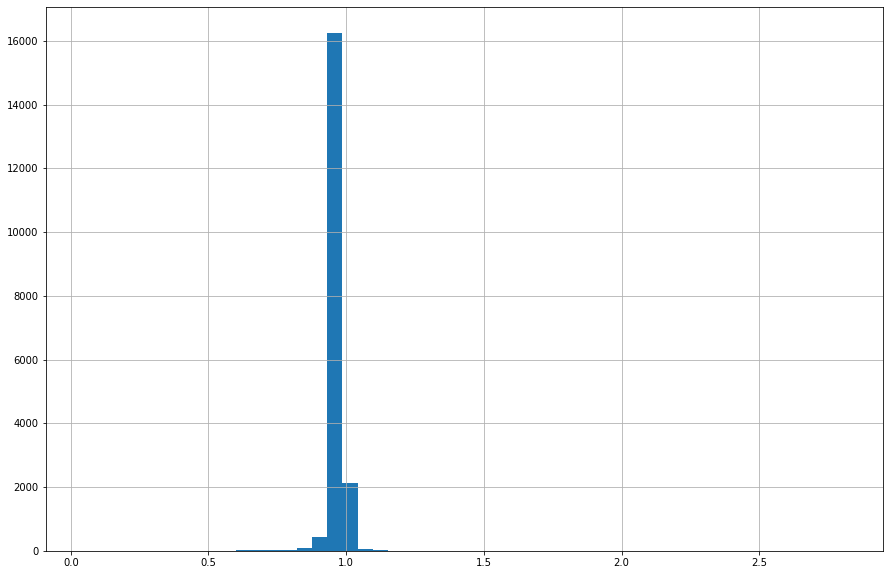

In [24]:
data_full['efficiency_final'] = (data_full['final.output.concentrate_au']
 * (data_full['primary_cleaner.output.concentrate_au']
    - data_full['final.output.tail_au'])) / (data_full['primary_cleaner.output.concentrate_au'] 
                                             * (data_full['final.output.concentrate_au'] 
                                                - data_full['final.output.tail_au']))
data_full[data_full['efficiency_final'] > 0]['efficiency_final'].hist(figsize=(15, 10), bins=50)
'Расчитанное распределение эффективности предприятий в финальной очистке'

In [25]:
data_full['efficiency_final'].max()
# максимальное значение эффективности

2.8101031968206853

'Распределение эффективности предприятий в финальной очистке'

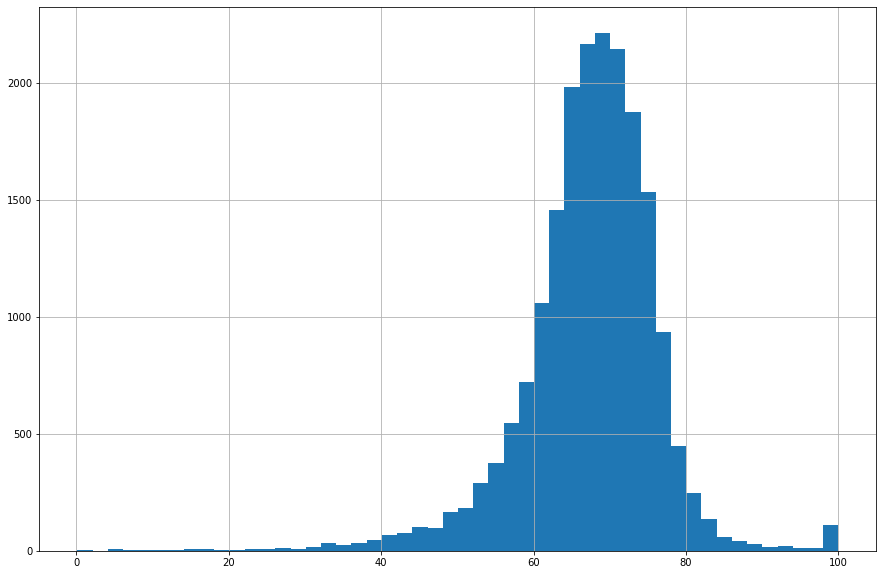

In [26]:
data_full[data_full['final.output.recovery'] > 0]['final.output.recovery'].hist(figsize=(15, 10), bins=50)
'Распределение эффективности предприятий в финальной очистке'

'Расчитанное распределение эффективности предприятий в флотации'

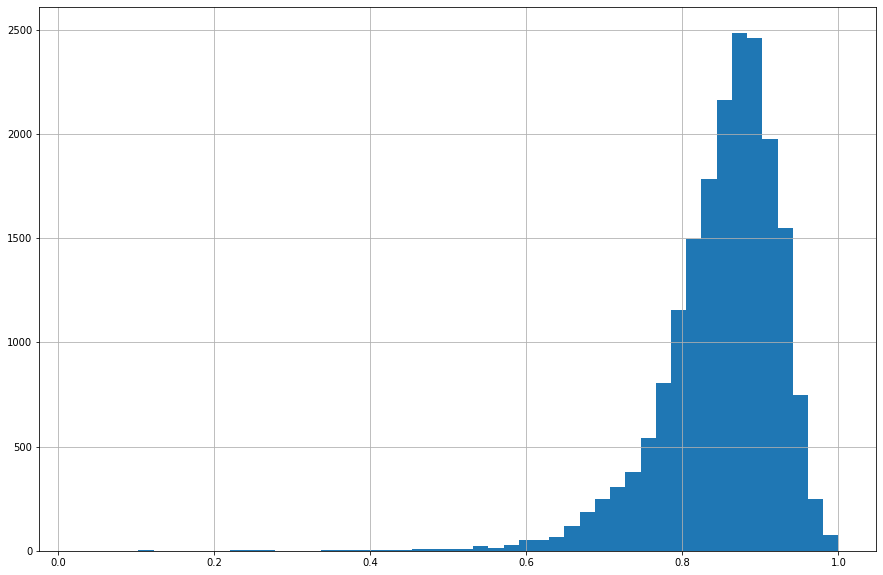

In [27]:
data_full['efficiency_rougher'] = (data_full['rougher.output.concentrate_au'] 
                                   * (data_full['rougher.input.feed_au'] 
                                      - data_full['rougher.output.tail_au'])) / (data_full['rougher.input.feed_au'] 
                                                                                 * (data_full['rougher.output.concentrate_au'] 
                                                                                    - data_full['rougher.output.tail_au']))
data_full[data_full['efficiency_rougher'] > 0]['efficiency_rougher'].hist(figsize=(15, 10), bins=50)
'Расчитанное распределение эффективности предприятий в флотации'

'Распределение эффективности предприятий в флотации'

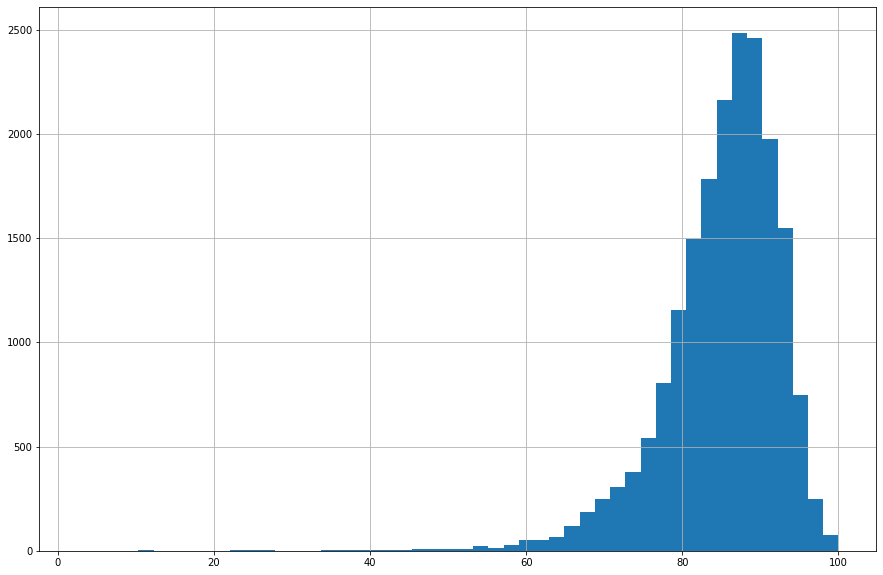

In [28]:
data_full[data_full['rougher.output.recovery'] > 0]['rougher.output.recovery'].hist(figsize=(15, 10), bins=50)
'Распределение эффективности предприятий в флотации'

Эффективность в таблице расчитана точно, гистаграмма эффективности флотации совпадает с ручными расчётами, с финальной эффективностью чуть другая ситуация, она должна расчитываьбся от вторичной очистки(

**1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между расчётами и значением признака.**

In [29]:
mean_absolute_error(data_full['rougher.output.recovery'], (data_full['efficiency_rougher'] * 100))

9.874045668302637e-15

MAE флотации составила 9.87 умноженное на 10 в -15 степени, ошибки практически нет, расчёт достаточно точный

In [30]:
data_full['efficiency_final'] = data_full['efficiency_final'].ffill()
data_full[data_full['efficiency_final'] == 0] = data_full['efficiency_final'].median()
efficiency_final = data_full['efficiency_final']
data_full['final.output.recovery'] = data_full['final.output.recovery'].ffill()
data_full[data_full['final.output.recovery'] == 0] = data_full['final.output.recovery'].median()
final_output_recovery = data_full['final.output.recovery']
data_full['efficiency_final'].isna().sum()
#mean_absolute_error(final_output_recovery, (efficiency_final * 100))

0

Флотацию большинство предприятий проходят с эффективностью около 90%, однако есть и выбивающиеся, не дотягивающие и 60%. А вот финальную обработку абсолютное большинство завершает с 95-98% эффективностью, однако есть и выбивающиеся значения, более 200%. Вероятнее всего это связано с тем, что расчёт идёт от первичной очистки, а не от вторичной.

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Для начала сделаем таблицу, после чего уже по ней построим наглядный график

In [31]:
au_ag_pb = ['final.output.concentrate_ag', 
            'final.output.concentrate_pb', 
            'final.output.concentrate_au', 
            'primary_cleaner.output.concentrate_ag', 
            'primary_cleaner.output.concentrate_pb', 
            'primary_cleaner.output.concentrate_au', 
            'rougher.output.concentrate_ag', 
            'rougher.output.concentrate_pb'
            'rougher.output.concentrate_au',
            'rougher.input.feed_ag',
            'rougher.input.feed_pb',
            'rougher.input.feed_au']

In [32]:
concntrate = pd.DataFrame({'metal': ['rougher.input', 'rougher.output', 'primary_cleaner', 'final.output'],
                          'au': [data_full['rougher.input.feed_au'].mean(),
                                data_full['rougher.output.concentrate_au'].mean(),
                                data_full['primary_cleaner.output.concentrate_au'].mean(),
                                data_full['final.output.concentrate_au'].mean()],
                          'pb': [data_full['rougher.input.feed_pb'].mean(),
                                data_full['rougher.output.concentrate_pb'].mean(),
                                data_full['primary_cleaner.output.concentrate_pb'].mean(),
                                data_full['final.output.concentrate_pb'].mean()],
                          'ag': [data_full['rougher.input.feed_ag'].mean(),
                                data_full['rougher.output.concentrate_ag'].mean(),
                                data_full['primary_cleaner.output.concentrate_ag'].mean(),
                                data_full['final.output.concentrate_ag'].mean()]})
concntrate['sum'] = concntrate['au'] + concntrate['pb'] + concntrate['ag']
concntrate

,metal,au,pb,ag,sum
0,rougher.input,8.245175,3.600000,8.772650,20.617825
1,rougher.output,19.687935,7.586279,11.954067,39.228282
2,primary_cleaner,31.992772,9.808608,8.428296,50.229676
3,final.output,44.095255,9.997638,5.187214,59.280107


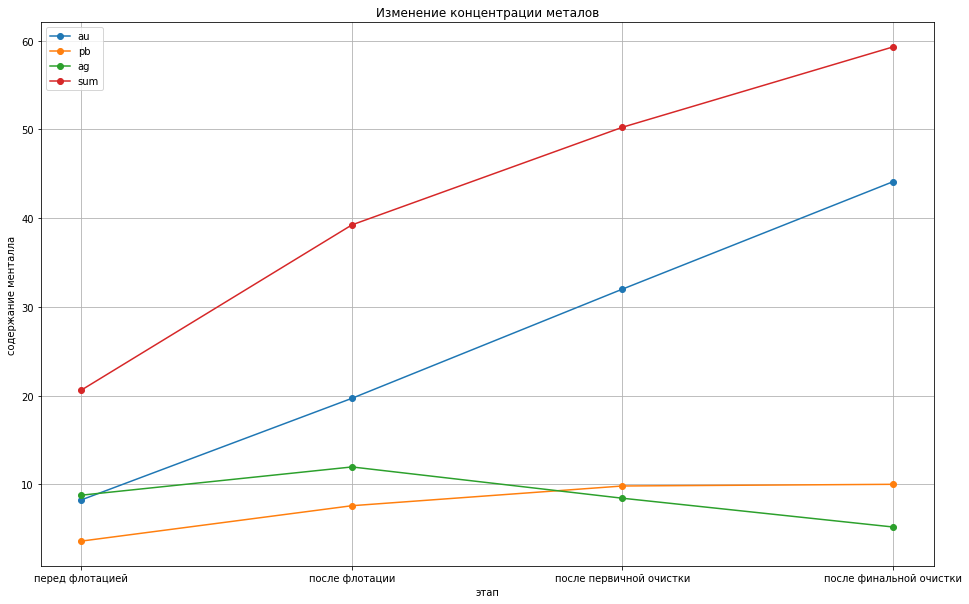

In [33]:
x = [0,1,2,3]
labels = ['перед флотацией', 'после флотации', 'после первичной очистки', 'после финальной очистки']
concntrate.plot(marker='o', grid=True, figsize=(16,10)).set_title('Изменение концентрации металов')
plt.xticks(x, labels)
plt.xlabel('этап')
plt.ylabel('содержание менталла')
plt.show()

Содержание золота после каждого этапа стабильно увеличивается, это ожидаемо, поскольку именно это является основной целью. Про другие металы такое сказать нельзя, содержание свинца практически не меняется после первичной очистки, а содержание серебра и вовсе становится всё меньше после флотации. При этом общее содержание металов так же стабильно растёт с каждым этапом, самый большой прирост происходит после флотации и с каждым этапом становиться меньше, вероятнее всего это связано с тем, что с каждым этапом обогощение становиться всё более сложной процедурой 

### Распределение суммарной концентрации металов на разных этапах

'Распределение содержания металов в изначальном сырье'

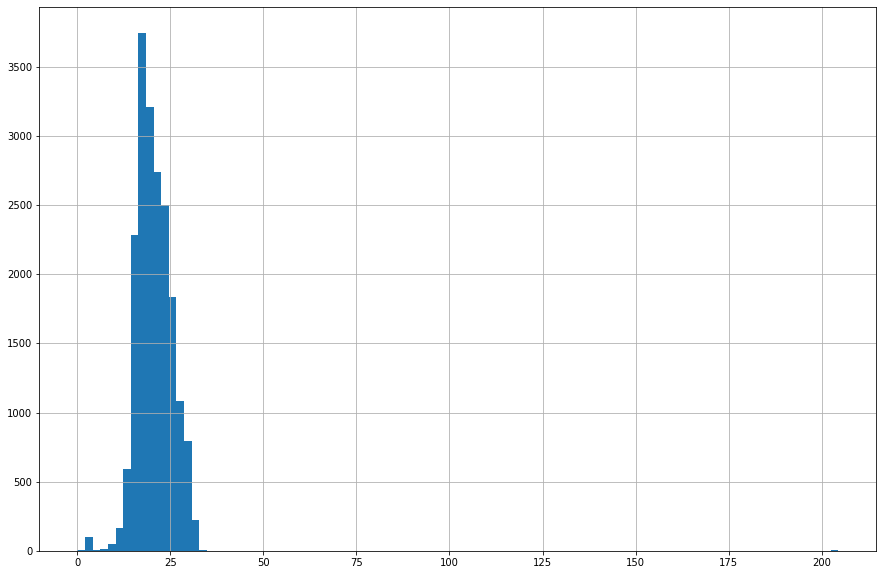

In [34]:
(data_full['rougher.input.feed_au'] + 
 data_full['rougher.input.feed_pb'] + 
 data_full['rougher.input.feed_ag']).hist(figsize=(15, 10), bins=100)
'Распределение содержания металов в изначальном сырье'

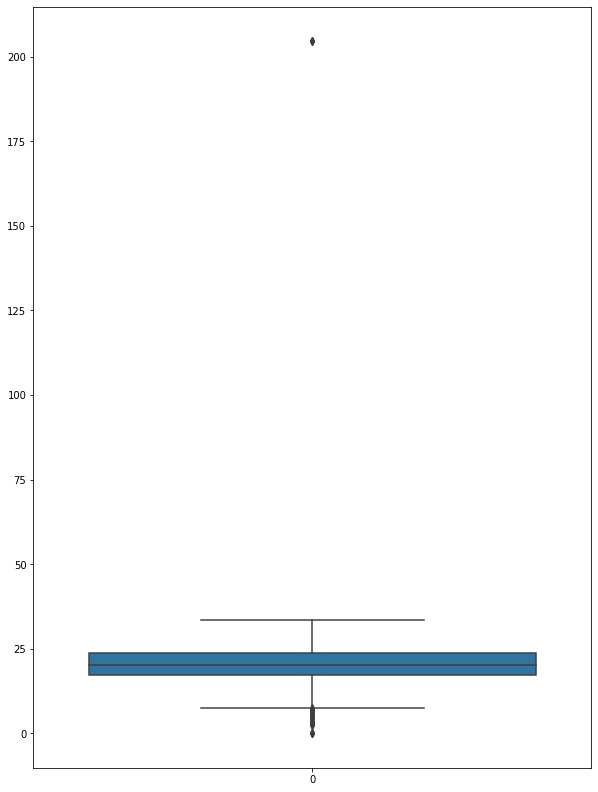

In [35]:
fig, ax = plt.subplots(figsize=(10, 14))
sns.boxplot(data=data_full['rougher.input.feed_au'] + 
 data_full['rougher.input.feed_pb'] + 
 data_full['rougher.input.feed_ag'])
plt.show()

'Распределение содержания металов после флотации'

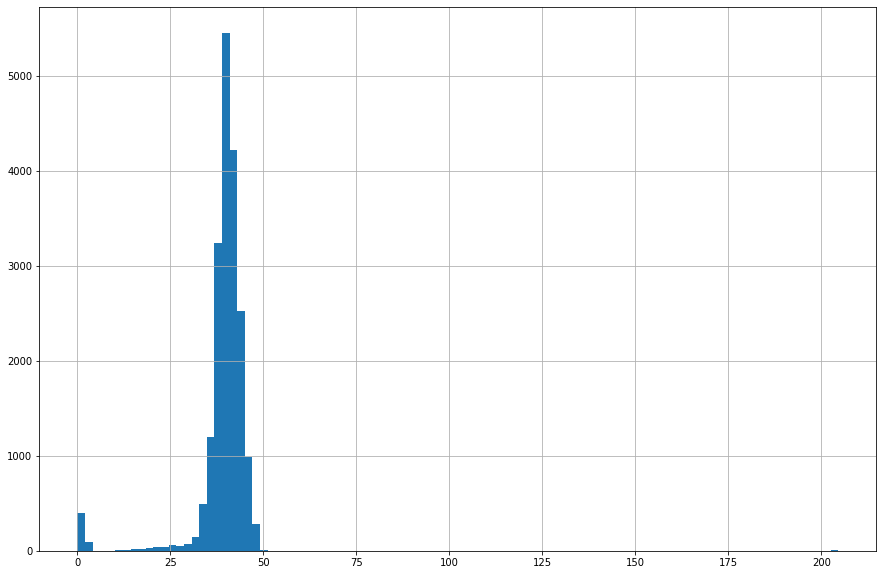

In [36]:
(data_full['rougher.output.concentrate_au'] + 
 data_full['rougher.output.concentrate_pb'] + 
 data_full['rougher.output.concentrate_ag']).hist(figsize=(15, 10), bins=100)
'Распределение содержания металов после флотации'

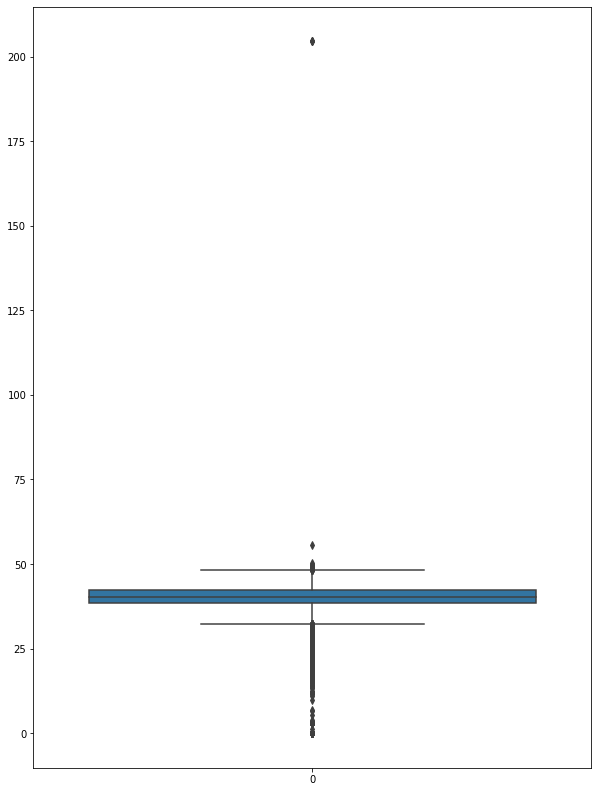

In [37]:
fig, ax = plt.subplots(figsize=(10, 14))
sns.boxplot(data=data_full['rougher.output.concentrate_au'] + 
 data_full['rougher.output.concentrate_pb'] + 
 data_full['rougher.output.concentrate_ag'])
plt.show()

'Распределение содержания металов после первичной очистки'

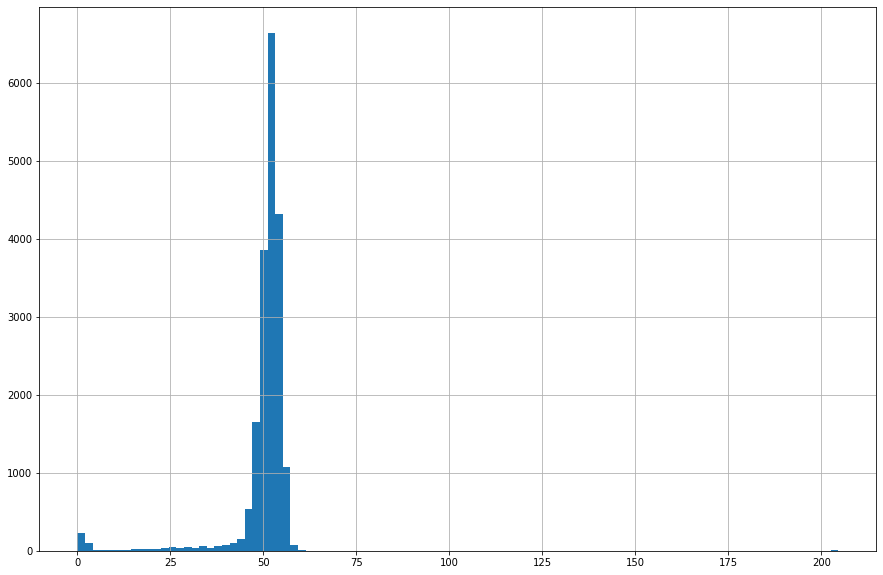

In [38]:
(data_full['primary_cleaner.output.concentrate_au'] + 
 data_full['primary_cleaner.output.concentrate_pb'] + 
 data_full['primary_cleaner.output.concentrate_ag']).hist(figsize=(15, 10), bins=100)
'Распределение содержания металов после первичной очистки'

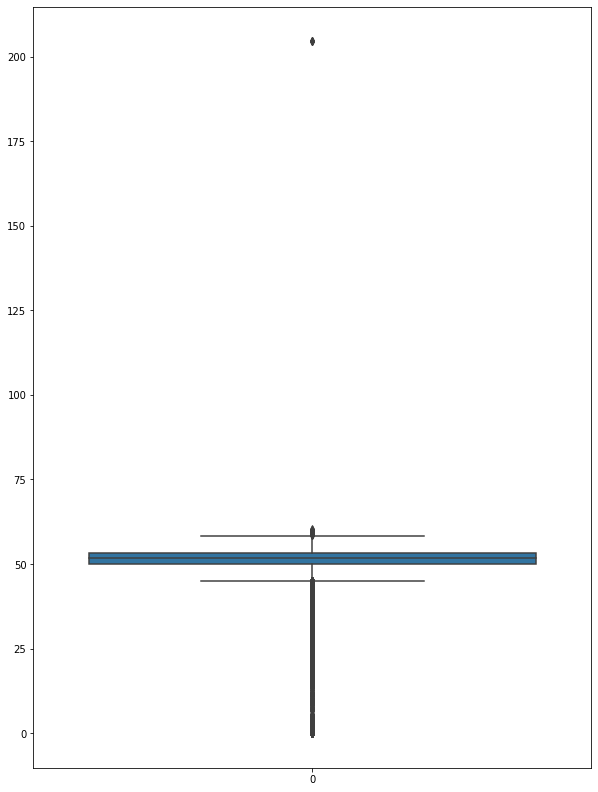

In [39]:
fig, ax = plt.subplots(figsize=(10, 14))
sns.boxplot(data=data_full['primary_cleaner.output.concentrate_au'] + 
 data_full['primary_cleaner.output.concentrate_pb'] + 
 data_full['primary_cleaner.output.concentrate_ag'])
plt.show()

'Распределение содержания металов после финальной очистки'

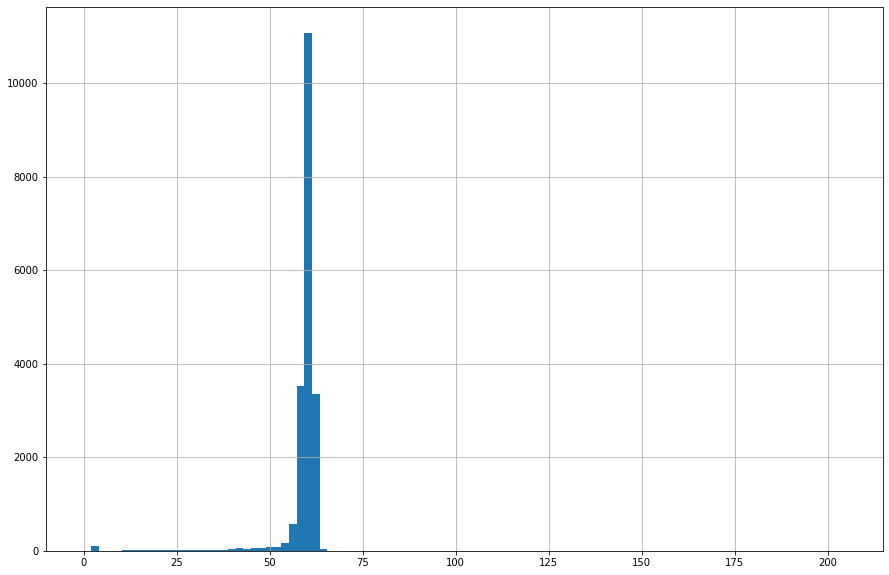

In [40]:
(data_full['final.output.concentrate_au'] + 
 data_full['final.output.concentrate_pb'] + 
 data_full['final.output.concentrate_ag']).hist(figsize=(15, 10), bins=100)
'Распределение содержания металов после финальной очистки'

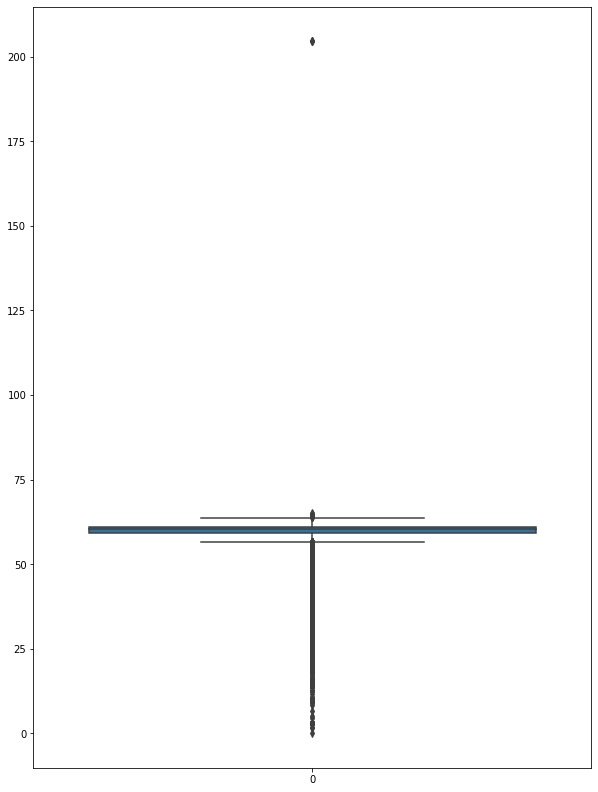

In [41]:
fig, ax = plt.subplots(figsize=(10, 14))
sns.boxplot(data=data_full['final.output.concentrate_au'] + 
 data_full['final.output.concentrate_pb'] + 
 data_full['final.output.concentrate_ag'])
plt.show()

Выбросы есть как в одну, так и вдругую сторону, значения ближе к нулю вероятнее всего связаны с пропущенными значениями, но есть так же некоторое количество около 200, возможно кто-то открыл секрет очень эффективной очистки) особенно хорошо видны выбросы диаграммх размаха. Однако для моделей такой выброс лучше будет убрать, для наиболее эффективного обучения

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

'Распределение размера гранул в треннировочной выборке'

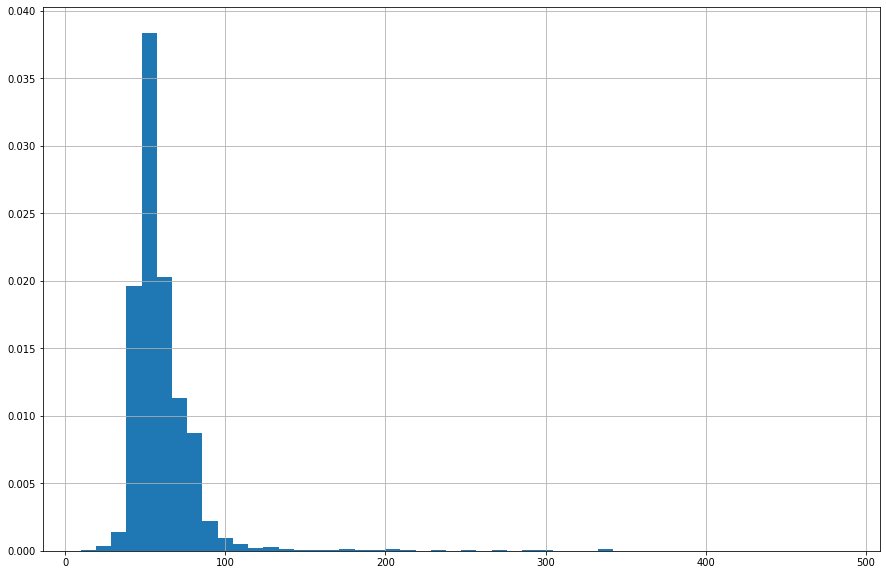

In [42]:
data_train['rougher.input.feed_size'].hist(figsize=(15, 10), bins=50, density=True)
'Распределение размера гранул в треннировочной выборке'

'Распределение размера гранул в тестовой выборке'

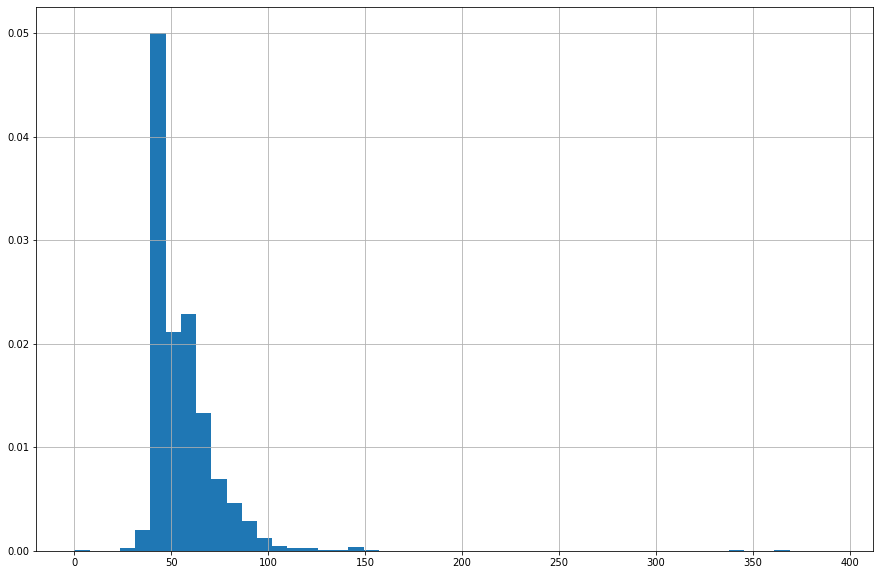

In [43]:
data_test['rougher.input.feed_size'].hist(figsize=(15, 10), bins=50, density=True)
'Распределение размера гранул в тестовой выборке'

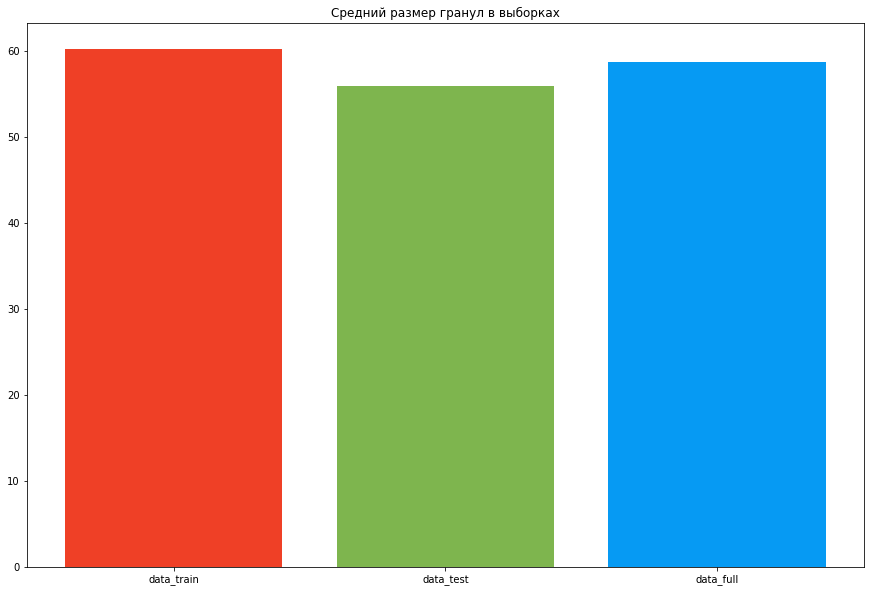

In [44]:
names = ['data_train', 'data_test', 'data_full']
values = [data_train['rougher.input.feed_size'].mean(), 
          data_test['rougher.input.feed_size'].mean(), 
          data_full['rougher.input.feed_size'].mean(),]
plt.figure(figsize=(15, 10))
plt.bar(names, values, color=[red, green, blue])
plt.title('Средний размер гранул в выборках')
plt.show()

Размеры гранул сырья достаточно сильно расходяться в обучающей и тестовой выборках, разница состовляет около 15% и может оказать существенное влияние на оценку модели

## Подготовка для моделей

### Подготовка таблицы

Поскольку размеры гранул в треннировочной и тестовой выборках очень сильно различаются, оценка модели может оказаться неправильной, потому лучше будет создать новую треннировочную таблицу из полной, чтобы такой разницы не было. Так же необходимо будет исключить все столбцы из треннировочных данных, кроме необходимых для расчётов и разобраться с пропусками. Дата и время так же исключаются из таблицы, не думаю, что они смогут сильно повлиять на итоговый результат

Один из методов борьбы со сдвигом, это удалить данные, влияющие на него, но в нашем случае это будет означать удалить весь столбец, но для начала стоит проверить, как взаимосвязаны наши таргеты с размером гранул

In [45]:
print(data_train['rougher.input.feed_size'].corr(data_train['final.output.recovery']))
print(data_train['rougher.input.feed_size'].corr(data_train['rougher.output.recovery']))

0.04886606833972999
0.05170222470371752


По сути они практически никак не влияют на таргеты. На проверку моделей он точно не может повлиять, поскольку проверка осуществляется с помощью кросс-валидации. Посмотрим что будет с тестовым набором

In [46]:
data_train = data_train[data_train['rougher.input.feed_ag'] < 100]
data_train = data_train[data_train['rougher.input.feed_pb'] < 100]
data_train = data_train[data_train['rougher.input.feed_au'] < 100]
# исключим из треннировочной выборки выбросы 

In [47]:
data_train_features_0 = data_train.drop(['final.output.concentrate_au',
                                       'rougher.output.concentrate_au',
                                       'final.output.concentrate_sol',
                                       'final.output.concentrate_pb',
                                       'final.output.concentrate_ag',
                                       'final.output.tail_sol',
                                       'final.output.tail_pb',
                                       'final.output.tail_ag',
                                       'primary_cleaner.output.tail_sol',
                                       'primary_cleaner.output.tail_pb',
                                       'primary_cleaner.output.tail_ag',
                                       'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                       'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                       'rougher.calculation.sulfate_to_au_concentrate',
                                       'secondary_cleaner.output.tail_sol',
                                       'secondary_cleaner.output.tail_pb',
                                       'secondary_cleaner.output.tail_ag',
                                       'secondary_cleaner.output.tail_au',
                                       'primary_cleaner.output.concentrate_sol',
                                       'primary_cleaner.output.concentrate_pb',
                                       'primary_cleaner.output.concentrate_ag',
                                       'final.output.concentrate_au',
                                       'rougher.output.concentrate_sol',
                                       'rougher.output.concentrate_pb',
                                       'rougher.output.concentrate_ag',
                                       'rougher.output.tail_sol',
                                       'rougher.output.tail_pb',
                                       'rougher.output.tail_ag',
                                       'rougher.calculation.au_pb_ratio',
                                       'primary_cleaner.output.tail_au',
                                       'date',
                                       'rougher.output.tail_au',
                                       'final.output.tail_au',
                                       'primary_cleaner.output.concentrate_au'], axis=1)


Таблицы готовы, остались только те столбцы, которые были в обеих таблицах

### Заполнение пропусков

In [48]:
for i in data_train_features_0:
    print('пропущенных значений в столбце' ,i, data_train_features_0[i].isna().sum())

пропущенных значений в столбце final.output.recovery 0
пропущенных значений в столбце primary_cleaner.input.sulfate 20
пропущенных значений в столбце primary_cleaner.input.depressant 32
пропущенных значений в столбце primary_cleaner.input.feed_size 0
пропущенных значений в столбце primary_cleaner.input.xanthate 100
пропущенных значений в столбце primary_cleaner.state.floatbank8_a_air 4
пропущенных значений в столбце primary_cleaner.state.floatbank8_a_level 1
пропущенных значений в столбце primary_cleaner.state.floatbank8_b_air 4
пропущенных значений в столбце primary_cleaner.state.floatbank8_b_level 1
пропущенных значений в столбце primary_cleaner.state.floatbank8_c_air 2
пропущенных значений в столбце primary_cleaner.state.floatbank8_c_level 1
пропущенных значений в столбце primary_cleaner.state.floatbank8_d_air 3
пропущенных значений в столбце primary_cleaner.state.floatbank8_d_level 1
пропущенных значений в столбце rougher.input.feed_ag 0
пропущенных значений в столбце rougher.input

Пропусков достаточно много, возможно некоторые из них связаны с тем, что различные элементы могут быть неиспользованны на различных этапах очистки, нужно это проверить

In [49]:
for i in data_train_features_0:
    print('нулевых значений в столбце' ,i, data_train_features_0[data_train_features_0[i] == 0][i].count())

нулевых значений в столбце final.output.recovery 58
нулевых значений в столбце primary_cleaner.input.sulfate 0
нулевых значений в столбце primary_cleaner.input.depressant 10
нулевых значений в столбце primary_cleaner.input.feed_size 0
нулевых значений в столбце primary_cleaner.input.xanthate 0
нулевых значений в столбце primary_cleaner.state.floatbank8_a_air 0
нулевых значений в столбце primary_cleaner.state.floatbank8_a_level 0
нулевых значений в столбце primary_cleaner.state.floatbank8_b_air 0
нулевых значений в столбце primary_cleaner.state.floatbank8_b_level 0
нулевых значений в столбце primary_cleaner.state.floatbank8_c_air 0
нулевых значений в столбце primary_cleaner.state.floatbank8_c_level 0
нулевых значений в столбце primary_cleaner.state.floatbank8_d_air 0
нулевых значений в столбце primary_cleaner.state.floatbank8_d_level 0
нулевых значений в столбце rougher.input.feed_ag 0
нулевых значений в столбце rougher.input.feed_pb 0
нулевых значений в столбце rougher.input.feed_rate 

Поменяем пропущенные значения на 0 там, где нули не встречались, также заполним пропуски медианными значениями. Так же у нас есть нулевые значения в столбцах rougher.output.concentrate_au и primary_cleaner.output.concentrate_au, они там не могут быть, поскольку в конечном итоге мы всё же получаем золото

In [50]:
data_train_features_0['rougher.input.floatbank11_xanthate'] = data_train_features_0[
    'rougher.input.floatbank11_xanthate'].fillna(0)
data_train_features_0['rougher.state.floatbank10_e_air'] = data_train_features_0[
    'rougher.state.floatbank10_e_air'].fillna(0)
data_train_features_0['secondary_cleaner.state.floatbank2_a_air'] = data_train_features_0[
    'secondary_cleaner.state.floatbank2_a_air'].fillna(0)
data_train_features_0['primary_cleaner.input.xanthate'] = data_train_features_0[
    'primary_cleaner.input.xanthate'].fillna(0)
data_test['rougher.input.floatbank11_xanthate'] = data_test[
    'rougher.input.floatbank11_xanthate'].fillna(0)
data_test['rougher.state.floatbank10_e_air'] = data_test[
    'rougher.state.floatbank10_e_air'].fillna(0)
data_test['secondary_cleaner.state.floatbank2_a_air'] = data_test[
    'secondary_cleaner.state.floatbank2_a_air'].fillna(0)
data_test['primary_cleaner.input.xanthate'] = data_test[
    'primary_cleaner.input.xanthate'].fillna(0)
data_full[data_full['rougher.output.concentrate_au'] == 0] = data_full[
    'rougher.output.concentrate_au'].median()
data_full[data_full['final.output.concentrate_au'] == 0] = data_full[
    'final.output.concentrate_au'].median()

In [51]:
# функция для амены пропусков на медианные значения с проверкой
for i in data_test:
    if data_test[i].isna().sum() > 0:
        data_test[i] = data_test[i].fillna(data_test[i].median())
for i in data_train_features_0:
    if data_train_features_0[i].isna().sum() > 0:
        data_train_features_0[i] = data_train_features_0[i].fillna(data_train_features_0[i].median())
    print('пропущенных значений в столбце' ,i, data_train_features_0[i].isna().sum())    

пропущенных значений в столбце final.output.recovery 0
пропущенных значений в столбце primary_cleaner.input.sulfate 0
пропущенных значений в столбце primary_cleaner.input.depressant 0
пропущенных значений в столбце primary_cleaner.input.feed_size 0
пропущенных значений в столбце primary_cleaner.input.xanthate 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_a_air 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_a_level 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_b_air 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_b_level 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_c_air 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_c_level 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_d_air 0
пропущенных значений в столбце primary_cleaner.state.floatbank8_d_level 0
пропущенных значений в столбце rougher.input.feed_ag 0
пропущенных значений в столбце rougher.input.fee

Всё готово, пропусков в таблице нет, при этом удалось избежать удаления значений в таблице

### Далее необходимо разделить полученную таблицу

Деление сделано для того, чтобы получить то же количество данных, которое было в изначальной треннировочной выборке

In [52]:
target_train_for = data_train_features_0['final.output.recovery']
target_train_ror = data_train_features_0['rougher.output.recovery']
features_train = data_train_features_0.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

Выборки разделены, все данные подготовленны, можно переходить к обучению моделей.

## Модель

Для тестовой выборки необходимо будет предсказать два показателя, а именно rougher.output.concentrate_au и final.output.concentrate_au, будем делать это по очереди

Каждую модель будем проверять с помощью кросс-валидации с делением на 5 выборок, стандартно для моделей регрессии метод будет находить метрику R2, соответственно чем ближе к 1 будет результат, тем точнее будет модель

### Напишем функцию для расчёта sMAPE для моделей

In [54]:
def smape_scor(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    summa_n = abs(y_true - y_pred)
    summa_d = ((abs(y_true) + abs(y_pred)) / 2)
    smape = sum(summa_n/summa_d)
    return smape*100/len(y_true)

### Начнём с расчёта эффективности финальной очистки

#### Extra Trees Regressor

In [ ]:
%%time
best_model = None
best_scores = 100
for depth in range(1, 11):
    model = ExtraTreesRegressor(random_state=RANDOM_STATE, max_depth=depth) 
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: ExtraTreesRegressor(max_depth=4, random_state=14149)
#лучший результат: 9.931254760218346
#длительность расчётов:
#CPU times: user 1min 11s, sys: 461 ms, total: 1min 12s
#Wall time: 1min 12s

#### Случайный лес

In [ ]:
%%time
best_model = None
best_scores = 100
for est in range(1, 11):
    for depth in range(1, 11):
        model = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
        final_score = scores.mean()
        if final_score < best_scores:
            best_model = model
            best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: RandomForestRegressor(max_depth=4, n_estimators=8, random_state=14149)
#лучший результат: 9.9654412098477
#длительность расчётов:
#CPU times: user 7min 26s, sys: 3.2 s, total: 7min 30s
#Wall time: 7min 30s

#### Линейная модель

In [55]:
%%time
model = LinearRegression()
scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
print(scores.mean())

12.789617955983035
CPU times: user 1.16 s, sys: 1.77 s, total: 2.93 s
Wall time: 3.68 s


#### Ada boost

In [ ]:
%%time
best_model = None
best_scores = 100
for est in range(1, 51):
    model = AdaBoostRegressor(random_state=RANDOM_STATE, n_estimators=est)
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: AdaBoostRegressor(n_estimators=4, random_state=14149)
#лучший результат: 10.704220905592653
#длительность расчётов:
#CPU times: user 8min 36s, sys: 3.85 s, total: 8min 40s
#Wall time: 8min 41s

#### Дерево решений

In [ ]:
%%time
best_model = None
best_scores = 100
for depth in range(1, 25):
    model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=depth) 
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: DecisionTreeRegressor(max_depth=4, random_state=14149)
#лучший результат: 10.118029741873931
#длительность расчётов:
#CPU times: user 1min 1s, sys: 351 ms, total: 1min 1s
#Wall time: 1min 1s

#### Регрессия на основе соседей

In [ ]:
%%time
best_model = None
best_scores = 100
for neig in range(1, 25):
    model = KNeighborsRegressor(n_neighbors=neig) 
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: KNeighborsRegressor(n_neighbors=24)
#лучший результат: 12.764884734518564
#длительность расчётов:
#CPU times: user 44.6 s, sys: 1min 9s, total: 1min 54s
#Wall time: 1min 56s

#### Gradient Boosting

In [56]:
%%time
best_model = None
best_scores = 100
for est in range(1, 21):
    model = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=est)
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

лучшая модель: GradientBoostingRegressor(n_estimators=15, random_state=14149)
лучший результат: 9.753111208279991
длительность расчётов:
CPU times: user 3min 29s, sys: 846 ms, total: 3min 30s
Wall time: 6min 53s


#### Bagging Regressor

In [ ]:
%%time
best_model = None
best_scores = 100
for est in range(1, 11):
    model = BaggingRegressor(random_state=RANDOM_STATE, n_estimators=est)
    scores = cross_val_score(model, features_train, target_train_for, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

In [ ]:
#лучшая модель: BaggingRegressor(random_state=14149)
#лучший результат: 11.709820025036667
#длительность расчётов:
#CPU times: user 2min 20s, sys: 594 ms, total: 2min 20s
#Wall time: 2min 21s

Лучше всех с задачей справился Gradient Boosting с 15 оценщиками, именно его и будем использовать для итоговых вычеслений, а теперь подберём модель для rougher.output.concentrate_au.

### Расчёт эффективности флотации

In [57]:
%%time
best_model = None
best_scores = 100
for depth in range(1, 12):
    model = ExtraTreesRegressor(random_state=RANDOM_STATE, max_depth=depth) 
    scores = cross_val_score(model, features_train, target_train_ror, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

лучшая модель: ExtraTreesRegressor(max_depth=4, random_state=14149)
лучший результат: 10.917349434265917
длительность расчётов:
CPU times: user 1min 46s, sys: 452 ms, total: 1min 47s
Wall time: 3min 32s


In [58]:
%%time
best_model = None
best_scores = 100
for est in range(1, 31):
    model = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=est)
    scores = cross_val_score(model, features_train, target_train_ror, cv=5, scoring=make_scorer(smape_scor))
    final_score = scores.mean()
    if final_score < best_scores:
        best_model = model
        best_scores = final_score
print('лучшая модель:', best_model)
print('лучший результат:', best_scores)
print('длительность расчётов:')

лучшая модель: GradientBoostingRegressor(n_estimators=28, random_state=14149)
лучший результат: 10.649874674666922
длительность расчётов:
CPU times: user 8min 11s, sys: 3 s, total: 8min 14s
Wall time: 30min 12s


С этой задачей Gradient Boosting так же справился лучше

## Функция для sMAPE и вычисления для тестовой выборки

In [59]:
data_test_m = data_test.drop('date', axis=1)
# для начала уберём дату-время так же как для обучающей воборки

### Предсказания

In [60]:
model = GradientBoostingRegressor(n_estimators=15, random_state=RANDOM_STATE)
model.fit(features_train, target_train_for)
predict_for = model.predict(data_test_m)

концентрация золота после финальной очистки для тестовой выборке предсказана, осталось предсказать концентрацию золота после флотации

In [61]:
model = GradientBoostingRegressor(n_estimators=28, random_state=RANDOM_STATE)
model.fit(features_train, target_train_ror)
predict_ror = model.predict(data_test_m)

Всё готово, можно соеденять все данные

### Теперь можно соеденить все данные

In [62]:
data_test['predict_rougher.output.recovery'] = predict_ror
data_test['predict_final.output.recovery'] = predict_for

In [63]:
data_test = data_test.merge(data_full, on='date', how='left')

In [64]:
data_test['rougher.output.recovery'] = data_test['rougher.output.recovery'].ffill()
data_test['final.output.recovery'] = data_test['final.output.recovery'].ffill()

Данные объеденены, переходим к расчётам

### Расчёт sMAPE

In [65]:
def smape(final, predict_final, rougher, predict_rougher):
    N = 1 / len(final)
    smape_final_0 = []
    smape_rougher_0 = []
    for i in range(len(final)):
        smape_final_0.append(abs(final[i] - predict_final[i]) / ((abs(final[i]) + abs(predict_final[i])) / 2))
        smape_rougher_0.append(abs(rougher[i] - predict_rougher[i]) / ((abs(rougher[i]) + abs(predict_rougher[i])) / 2))
    smape_final = N * sum(smape_final_0) * 100
    smape_rougher = N * sum(smape_rougher_0) * 100
    smape_total = (0.25 * smape_rougher) + (0.75 * smape_final)
    print('метрика sMAPE финальной очистки =', smape_final)
    print('метрика sMAPE флотации =', smape_rougher)
    print('итоговая метрика sMAPE =', smape_total)
    names = ['sMAPE финальной очистки', 'sMAPE флотации', 'итоговая sMAPE']
    values = [smape_final, 
              smape_rougher, 
              smape_total,]
    plt.figure(figsize=(15, 10))
    plt.bar(names, values, color=[red, green, blue])
    plt.title('sMAPE')
    plt.show()
    return smape_final, smape_rougher, smape_total

метрика sMAPE финальной очистки = 7.81244453858289
метрика sMAPE флотации = 5.708764317258245
итоговая метрика sMAPE = 7.286524483251728


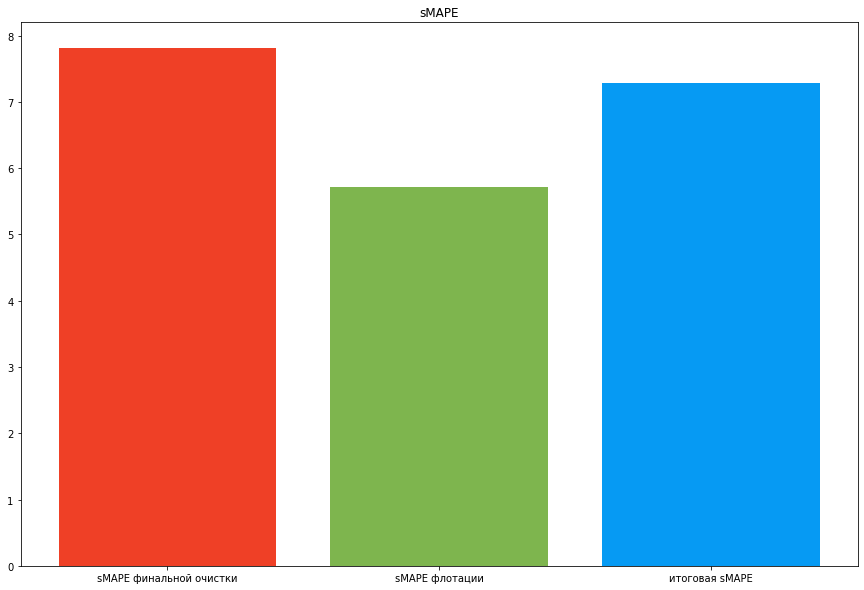

(7.81244453858289, 5.708764317258245, 7.286524483251728)

In [66]:
smape(data_test['final.output.recovery'],
     data_test['predict_final.output.recovery'],
     data_test['rougher.output.recovery'],
     data_test['predict_rougher.output.recovery'])

### Проверка адекватности модели

In [78]:
model = DummyRegressor()
model.fit(features_train, target_train_for)
predict_for_dummy = model.predict(data_test_m)

In [79]:
model = DummyRegressor()
model.fit(features_train, target_train_ror)
predict_ror_dummy = model.predict(data_test_m)

In [89]:
data_test_dummy = data_test.copy()
data_test_dummy['predict_final.output.recovery'] = predict_for_dummy
data_test_dummy['predict_rougher.output.recovery'] = predict_ror_dummy

In [94]:
data_test_dummy = data_test_dummy.merge(data_full, on='date', how='left')

In [95]:
data_test_dummy['rougher.output.recovery'] = data_test_dummy['rougher.output.recovery'].ffill()
data_test_dummy['final.output.recovery'] = data_test_dummy['final.output.recovery'].ffill()

метрика sMAPE финальной очистки = 8.956505606499396
метрика sMAPE флотации = 6.758571127978202
итоговая метрика sMAPE = 8.407021986869097


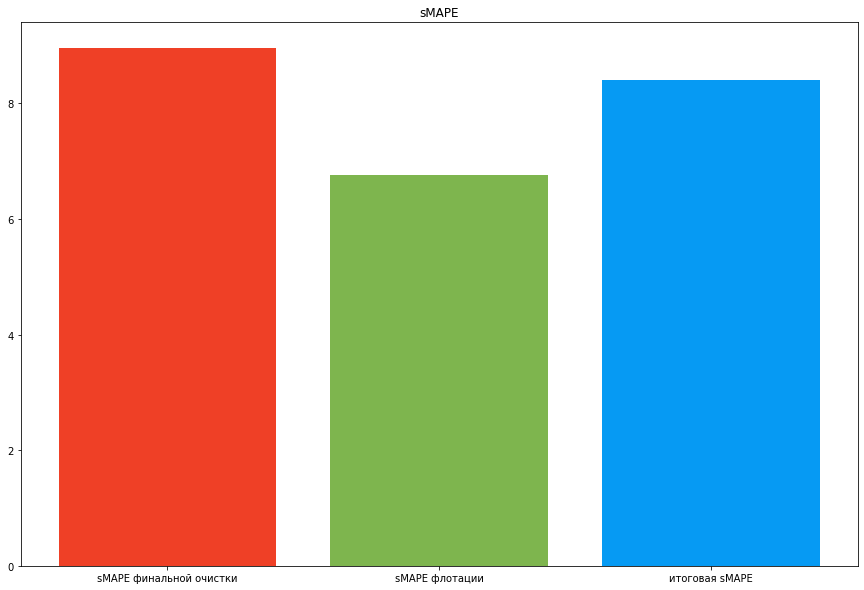

(8.956505606499396, 6.758571127978202, 8.407021986869097)

In [96]:
smape(data_test_dummy['final.output.recovery'],
     data_test_dummy['predict_final.output.recovery'],
     data_test_dummy['rougher.output.recovery'],
     data_test_dummy['predict_rougher.output.recovery'])

## Вывод

```
Модель для расчёта sMAPE готова, итоговый показатель получился 7.29% при этом sMAPE финальной очистки составляет 7.81%, а флотации 5.7%. Для расчёта показателей эффективности финальной очистки и флотации лучше всего подошла модель Gradient Boosting с разным количеством оценщиков, для финальной очистки - 15, а для флотации - 28. При этом наша модель превзошла базовую, которая указывает везде среднее значение более чем на 1% по итоговому sMAPE
```

```
В данных было очень много пропущенных значений, большинство из которых были заполнены, либо 0, там где такой метод кажется правильным, либо медианными значениями по всей выборке. Так же тренировочная и тестовая выборки очень сильно различались по величине изначальных гранул сырья, приблизительно на 15%, поэтому было решено составить новый треннировочный набор из полных данных для компенсации этого различия. Для предсказаний концентрации золота было проверено 7 моделей, однако большинство из них очень плохо справились с поставленной задачей, лучшие показатели метрики R2 0.39 для финальной очистки и 0.74 для флотации
```